# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [3]:
print(data.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.shape

(23699, 22)

### Предобработка данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице содержится всего 23699 записей. Во многих столбцах исследуемой таблицы есть пропуски. 

Самое большое количество пропусков в столбцах с информацией о высоте потолков, наличии балкона, расстоянии до ближайшего парка и ближайшего водоема, а также о том, является ли продаваемый объект аппартаментами. 

Также достаточно большое количество пропусков в столбцах: жилая площадь, площадь кухни, расстояние до центра города, сколько дней было размещено объявление, число водоемов и парков в радиусе 3 км. 

И совсем несущественное количество пропусков (по отношению к общему числу записей) мы наблюдаем в столбцах locality_name (название населенного пукта) и floors_total (этажность дома).


**1. Высота потолков (celling_height)**. По всей видимости, многие продавцы не заполнили поле с высотой потолков, потому что не знают точно эту величину, а т.к. для многих это не самый важный параметр, оставляют это поле пустым. Следует также отметить, что обычно люди гордятся высокими потолками и, следовательно, скорее всего, заполняют это поле в объявлении. Т.е., массовые пропуски высоких значейний вряд ли возможны, поэтому не будет ошибки, если мы заполним пропуски медианой от всех значений поля celling_height.

In [8]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [9]:
print(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45
   5.5  

Помимо пропусков в данных по высоте потолков есть также проблема с некоторыми значениями. Квартир с потолками 100 м и 27 м не бывает. В некоторых случаях явно пропущена запятая. Если вместо 27 проставить 2.7, то получим вполне правдоподобный результат. Но при делении 100 на 10, высота все равно будет далека от действительной. Для того, чтобы получить правдоподобные результаты, мы можем оставить значения от 2.5 до 5, как есть, а значения от 25 до 50 поделим на 10. Всё, что не входит в эти интервалы заполним медианой.

In [10]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50), 'ceiling_height'] / 10

In [11]:
data.loc[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 50) | ((data['ceiling_height'] > 5) &  (data['ceiling_height'] < 25)), 'ceiling_height'] = \
data['ceiling_height'].median()

In [12]:
print(data['ceiling_height'].unique())

[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.73 2.84
 3.1  3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 2.87 2.66 2.59
 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62 3.12 2.53 2.74 2.96 5.
 2.79 2.95 4.06 2.94 3.82 3.54 3.53 2.83 4.7  3.38 3.01 3.65 3.9  3.18
 3.35 3.57 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67 3.87 3.66
 3.85 3.86 4.19 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07 3.37 3.09 3.26
 3.34 2.81 3.44 2.97 3.14 4.37 2.68 3.22 3.27 4.1  2.93 3.46 3.47 3.33
 3.63 3.32 2.98 2.86 3.17 4.4  3.28 3.04 4.45 3.84 3.23 3.02 3.21 3.43
 3.78 4.3  3.39 2.69 3.31 4.65 3.56 3.51 3.93 3.42 2.99 3.49 4.14 2.91
 3.88 4.25 3.29 3.76 3.69 2.89 3.58 4.9  3.48 3.59]


 **2. Количество этажей (floors_total).** Пропусков этажности в датафрейме немного. Заполним их медианным значением. 

In [13]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floors_total'].median()

**3. Название населенного пункта (locality_name).** Заполнить пропуски с названиями населенных пунктов невозможно. Удалим строки со значением Nan в locality_name. Их количество небольшое, поэтому на результаты исследования удаление таких строк не повлияет.

In [14]:
data = data.dropna(subset=['locality_name'])

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В столбце с названиями населенных пунктов присутствуют дубликаты, от которых нужно избавиться. При просмотре списка населенных пунктов видно, что есть много дубликатов записей, в которых слово "поселок" написано с разными буквами ("е" и "ё"). Также есть записи в которых "посёлок городского типа" записан, как "городской посёлок", "поселок при железнодорожной станции", как "поселок станции" и "садоводческое некоммерческое товарищество", как "садовое товарищество".

Выполним исправления.

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [17]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [18]:
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')

In [19]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'садоводческое некоммерческое товарищество')

In [20]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

**4. Наличие балкона (balcony)**. Наиболее вероятная причина, по которой не заполнено данное поле - отсутствие балкона в квартире. Маловероятно, что продавец, размещая объявление, забудет отметить такой существенный плюс квартиры. Значит мы можем заменить пропуски в данном столбце на нули.  

In [21]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

**5. Апартаменты (is_apartment)**. Самое большое количество пропусков именно в этом столбце. Отличить по каким-либо параметрам является ли объект апартаментами или квартирой, невозможно.

In [22]:
print(data['is_apartment'].value_counts())

False    2710
True       50
Name: is_apartment, dtype: int64


Если помотреть на данные по тем объектам, у которых поле с апартаментами заполнено, можно увидеть, что объектов, которые относятся к апартаментам очень мало (менее 2% от общего числа записей). На основе этого наблюдения мы можем заполнить пропуски в поле is_apartment на значение False.

In [23]:
data['is_apartment'] = data.loc[data['is_apartment'].isna(), 'is_apartment'] = 'False'

Тип столбца is_apartment - Object, он заполнен строками. Правильнее будет преобразовать тип значений столбца в логический. 

In [24]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**6. Площадь кухни (kitchen_area)** Пропусков в данном столбце 2278, что составляет примерно 9,6% от общего количества записей. Наиболее вероятные причины, по которым пользователи могли пропустить данное поле:
- Отсутствие кухни (например, в студиях)
- Незнание точного метража кухни (бывает так, что это поле заполняется позже, когда продавец нашел планировку своей квартиры или сам сделал замер помещения)

Обычно в типовых домах кухни имеют одинаковый размер (если не было перепланировок). Серии домов в исследуемом датасете отсутствуют, поэтому мы можем сгруппировать квартиры по количеству комнат в квартире, посчитать для каждой полученной группы медианные значения площадей кухонь и заполнить ими пропуски. В том случае, если количество комнат равно нулю, площадь кухни заполним не медианой, а нулем, т.к. вероятнее всего, объект является студией, либо изначально был квартирой, но была сделана перепланировка, при которой разделения помещения на комнаты и кухню не стало.

In [26]:
print(data['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


In [27]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()) & (data['rooms'] != 0), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t) & (data['rooms'] != 0), 'kitchen_area'].median()

In [28]:
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0

**9. Жилая площадь (living_area).** Заполним пропуски в данном столбце так же, как и в столбце с площадью кухонь, сгруппировав объекты по количеству комнат, и, подставив медианные значения вместо пропусков. 

In [29]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

**10. Количество дней размещения объявления (days_exposition ).** Т.к. в данном столбце у нас рассчитано количество дней размещения объявления от публикации до снятия, то можно предположить, что объявления, в которых данное поле не заполнено, до сих пор не сняты с публикации. Либо такие квартиры еще продаются, либо продавец забыл снять свое объявление, и оно уже неактуальное размещено на сайте. Такие объявления следует исключить из анализа, потому что предположить, через сколько дней были проданы квартиры мы не можем.

In [30]:
data = data.dropna(subset=['days_exposition'])

**11. Дата публикации (first_day_exposition).** В данном столбце нет пропусков, но тип данных строковый. Преобразуем его в datetime.  

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20470 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20470 non-null  int64         
 1   last_price            20470 non-null  float64       
 2   total_area            20470 non-null  float64       
 3   first_day_exposition  20470 non-null  datetime64[ns]
 4   rooms                 20470 non-null  int64         
 5   ceiling_height        20470 non-null  float64       
 6   floors_total          20470 non-null  float64       
 7   living_area           20470 non-null  float64       
 8   floor                 20470 non-null  int64         
 9   is_apartment          20470 non-null  bool          
 10  studio                20470 non-null  bool          
 11  open_plan             20470 non-null  bool          
 12  kitchen_area          20470 non-null  float64       
 13  balcony         

**11. Расстояние до ближ. аэропорта (airports_nearest), Расстояние до центра города (cityCenters_nearest), Число парков в радиусе 3 км (parks_around3000), Расстояние до ближайшего парка (parks_nearest), Число парков в радиусе 3 км (ponds_around3000), Расстояние до ближайшего парка (ponds_nearest).**

Исследуем сначала данные по паркам

In [33]:
print(data['parks_around3000'].unique())

[ 0.  1.  2. nan  3.]


In [34]:
print(data['parks_around3000'].value_counts())

0.0    8909
1.0    4868
2.0    1502
3.0     545
Name: parks_around3000, dtype: int64


In [35]:
print(data['parks_around3000'].isna().sum())

4646


In [36]:
len(set(data.loc[data['parks_around3000'].isna(), 'locality_name']))

274

In [37]:
len(set(data.loc[~data['parks_around3000'].isna(), 'locality_name']))

27

В 275 населенных пунктах есть парки (в радиусе 3 км от объектов недвижимости), в 27 - парков нет. 

In [38]:
(
    set(data.loc[data['parks_around3000'].isna(), 'locality_name']) &
    set(data.loc[~data['parks_around3000'].isna(), 'locality_name'])
)

{'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'поселок Щеглово'}

Мы видим, что в 8 населенных пунктах есть объекты, как с наличием парков в окрестности, так и без них. Рассмотрим некоторые из них, чтобы понять, из-за чего могут появиться пропуски.
Город Санкт-Петербург очень большой, поэтому там есть дома, как рядом с парками, так и в районах, где парков поблизости нет.
Красное Село. В нем есть парк, но, если сделать на Яндекс.карте замеры от парка до некоторых окраин города, то увидим расстояние более 3 км.
Кронштадт. Есть места обозначенные на карте, как парки, а есть просто зеленые зоны, не являющиеся парками. Если сделать замеры от мест, которые официально считаются парками, до разных точек города, то мы так же, как и в предыдущем случае, увидим, что есть много расстояний, которые превышают 3 км.
Эти примеры дают нам основание предположить, что причина пропуска данных в столбцах с парками состоит в том, что в исследуемом радиусе (3 км) парки отсутствуют, пропуски можно заменить на 0. Такая же ситуация и с прудами (ponds_around3000)

In [39]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

In [40]:
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

Теперь рассмотрим столбец с расстояниями от объектов до парков. Пропусков здесь достаточно много.

In [41]:
print(data['parks_nearest'].isna().sum())

13551


In [42]:
print(data['parks_nearest'].min())

1.0


In [43]:
print(data['parks_nearest'].max())

3190.0


Если мы сравним данные столбцов parks_around3000 и parks_nearest, то увидим, что пропуски в столбце parks_nearest означают отсутствие парков рядом. Со значением 0 в parks_around3000 изначально было 8909, со значением Nan - 4646. 8909 + 4646 = 13555 - это объекты, у которых в радиусе 3 км. нет парков. Видим, что цифры (13551 и 13555) почти сошлись. В таком случае мы можем использовать для заполнения пропусков в parks_nearest какое-то болшое значение, превышающее 3 км. Примем за такое значение 4 км (или 4000 м)

In [44]:
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = 4000

Теперь сделаем такую же проверку по столбцу с расстоянием до прудов

In [45]:
print(data['ponds_nearest'].isna().sum())

12601


In [46]:
print(data['ponds_nearest'].min())

13.0


In [47]:
print(data['ponds_nearest'].max())

1344.0


In [48]:
print(data['ponds_around3000'].value_counts())

0.0    12601
1.0     4968
2.0     1639
3.0     1262
Name: ponds_around3000, dtype: int64


По водоемам тоже всё сходится. Количество пропущенных значений в столбце ponds_nearest совпадает с количеством нулевых значений в ponds_around3000, т.е. пропуски в ponds_nearest означают, что расстояние до ближайшего водоема превышает 3000. Примем его за 4000. 

In [49]:
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = 4000

Проанализируем столбец airports_nearest

In [50]:
print(data['airports_nearest'].min())

0.0


In [51]:
print(data['airports_nearest'].max())

84869.0


In [52]:
print(data['airports_nearest'].isna().sum())

4668


Вероятно, возможная причина пропусков расстояний до аэропорта в превышении какого-то значения. У нас в данных максимальное значение составляет 84869 м., или почти 85 км. Скорее всего системой заполняются только значения менее 100 км. Заполним пропуски каким-то значением существенно превышающим максимальное, например, 120 км (120000 м)

In [53]:
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = 120000

И последний параметр - расстояние до центра города (cityCenters_nearest). 

In [54]:
print(data['cityCenters_nearest'].isna().sum())

4646


In [55]:
print(data['cityCenters_nearest'].min())

208.0


In [56]:
print(data['cityCenters_nearest'].max())

65968.0


Максимальное расстояние выглядит странным. Если бы данное поле заполнялось пользователем, то можно было бы предположить некорректность в заполнении, но это поле заполняется автоматически. Вероятнее всего, имеется ввиду расстояние до центра города Санкт-Петербург.

In [57]:
 set(data.loc[(data['cityCenters_nearest'] < 70000) & (data['cityCenters_nearest'] > 30000), 'locality_name'])

{'Зеленогорск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Павловск',
 'Петергоф',
 'Пушкин',
 'Сестрорецк',
 'поселок Белоостров',
 'поселок Молодежное',
 'поселок Понтонный',
 'поселок Репино',
 'поселок Саперный',
 'поселок Шушары',
 'поселок Щеглово'}

In [58]:
 set(data.loc[(data['cityCenters_nearest'] < 10000), 'locality_name'])

{'Санкт-Петербург'}

Анализ показал, что предположение о том, что в столбце cityCenters_nearest указано расстояние до Санкт-Петербурга верное. Следовательно, как и в предыдущих случаях логично заменить пропуски на расстояние, превышающее максимальное в данном столбце, т.е. более 65968. Возьмем 80 км (80000 м)

In [59]:
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = 80000

In [60]:
print(data.isna().sum())

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


**12. Цена на момент снятия с публикации (last_price)**

In [61]:
print(data['last_price'].max())

763000000.0


In [62]:
set(data.loc[(data['last_price'] <= 763000000.0) & (data['last_price'] >= 100000000.0), 'locality_name'])

{'Санкт-Петербург'}

In [63]:
print(data['last_price'].min())

12190.0


In [64]:
set(data.loc[(data['last_price'] <= 100000.0) & (data['last_price'] >= 12190.0), 'locality_name'])

{'Санкт-Петербург'}

In [65]:
set(data.loc[(data['last_price'] <= 200000.0) & (data['last_price'] > 100000.0), 'locality_name'])

set()

In [66]:
set(data.loc[(data['last_price'] < 400000.0) & (data['last_price'] > 200000.0), 'locality_name'])

set()

Видим, что в данных присутствуют, как очень высокие, так и очень низкие цены. Объекты стоимостью от 100 млн.руб. до 763 млн.руб. есть только в Санкт-Петербурге. В таком городе возможны вип-объекты по высокой цене. А вот стоимость квартиры в 12 тысяч рублей в Санкт-Петербурге - это явная ошибка. Проверим, что из себя представляют объекты с аномально-низкой стоимостью.  

In [67]:
print(data[data['last_price'] <= 100000.0])

      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7     12190.0       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793            2.75          25.0         32.0     25          True  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
8793          40.5      0.0  Санкт-Петербург           36421.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793              9176.0               1.0          805.0               0.0   

      ponds_nearest  days_exposition  
8793         4000.0              8.0  

[1 rows x 22 columns]


Такой объект всего один. Его общая площадь составляет 109 кв. м., кухня 40,5 кв.м. Находится на расстоянии 9 км. от центра города. Расположен на 25-м этаже 25-этажного дома. Это апартаменты. С учетом того, что объект находится относительно недалеко от центра и имеет большую площадь, но при этом является апартаментами, т.е. юридически имеет статус нежилого помещения, что снижает стоимость объекта, вероятнее всего продавец проставляе стоимость имел ввиду 12190 тыс. руб. Домножим цену на 1000.  

In [68]:
data.loc[data['last_price'] <= 100000, 'last_price'] = \
data.loc[data['last_price'] <= 100000, 'last_price'] * 1000

**13. Количество этажей в доме (floors_total)** Столбец floors_total содержит данные в формате вещественных чисел. Но номер этажа не может быть дробным. Преобразуем тип в целочисленный (int)

In [69]:
data['floors_total'] = data['floors_total'].astype(int)

### Посчитаем и добавим в таблицу новые столбцы

In [70]:
data['square_meter_price'] = data['last_price'] / data['total_area'] #Добавляем столбец со стоимостью квадратного метра

In [71]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek #Добавляем столбец с днями недели

In [72]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month #Добавляем столбец с номером месяца

In [73]:
print(data.loc[:, ['first_day_exposition', 'publication_month']].head(10)) #Проверяем, как отображаются данные в новом столбце

   first_day_exposition  publication_month
1            2018-12-04                 12
2            2015-08-20                  8
3            2015-07-24                  7
4            2018-06-19                  6
5            2018-09-10                  9
6            2017-11-02                 11
8            2018-05-23                  5
9            2017-02-26                  2
10           2017-11-16                 11
11           2018-08-27                  8


In [74]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year #Добавляем столбец с годом

In [75]:
print(data.loc[:, ['first_day_exposition', 'publication_year']].head()) 

  first_day_exposition  publication_year
1           2018-12-04              2018
2           2015-08-20              2015
3           2015-07-24              2015
4           2018-06-19              2018
5           2018-09-10              2018


In [76]:
#Формируем новый столбец с типом этажа
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'другой'

In [77]:
print(data.loc[:, ['floors_total', 'floor', 'floor_type']].head(15))

    floors_total  floor floor_type
1             11      1     первый
2              5      4     другой
3             14      9     другой
4             14     13     другой
5             12      5     другой
6             26      6     другой
8             27     26     другой
9              9      7     другой
10            12      3     другой
11             5      4     другой
12             5      5  последний
13             5      5  последний
14             6      1     первый
15            14      5     другой
16             5      1     первый


In [78]:
print(data['floor'].isna().sum())

0


In [79]:
#Добавляем столбец с расстоянием до центра города в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000).astype(int)

In [80]:
print(data.loc[:, ['cityCenters_nearest_km', 'cityCenters_nearest']].head())

   cityCenters_nearest_km  cityCenters_nearest
1                      19              18603.0
2                      14              13933.0
3                       7               6800.0
4                       8               8098.0
5                      80              80000.0


### Проведем исследовательский анализ данных

**1. Изучение параметров объектов**

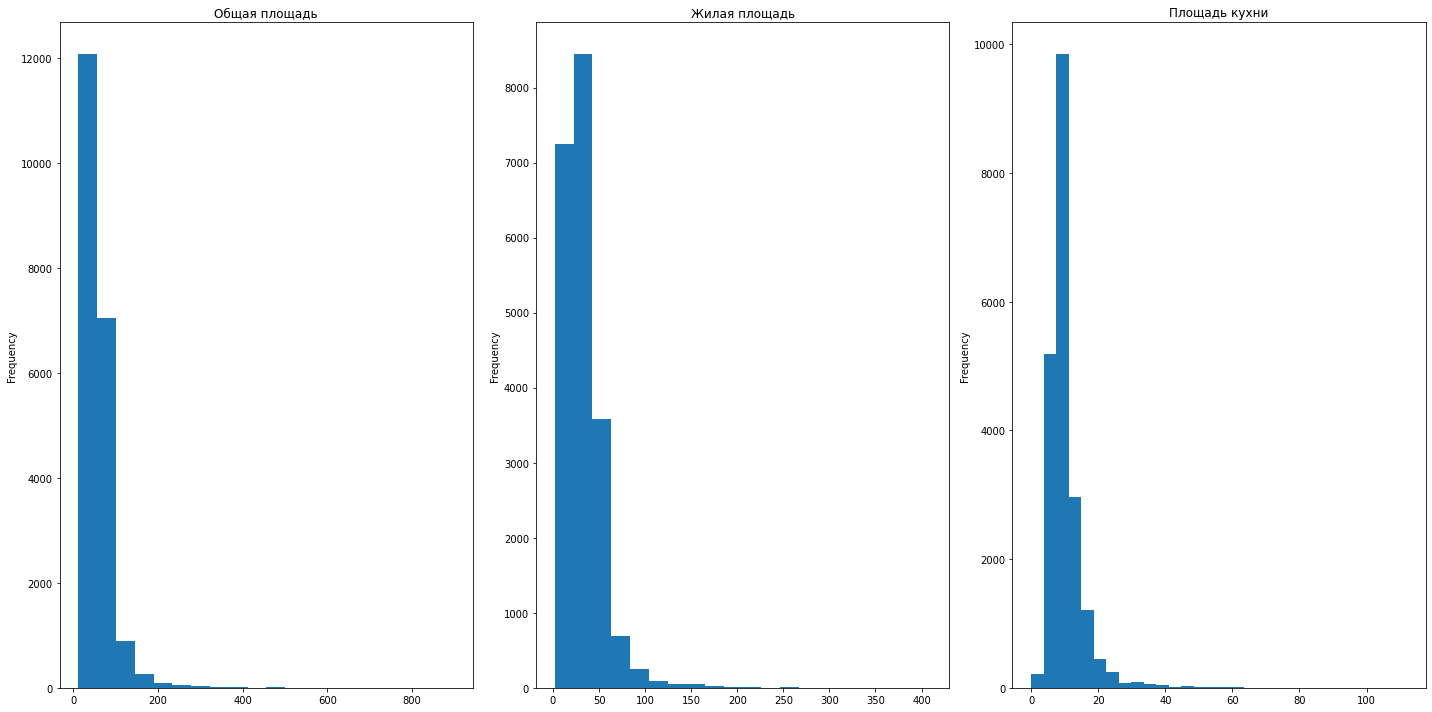

In [81]:
fig, axs = plt.subplots(1, 3)

data['total_area'].plot(ax=axs[0], kind='hist', title='Общая площадь', figsize=(20, 10), bins=20)
data['living_area'].plot(ax=axs[1], kind='hist', title='Жилая площадь', bins=20)
data['kitchen_area'].plot(ax=axs[2], kind='hist', title='Площадь кухни', bins=30)

plt.tight_layout()

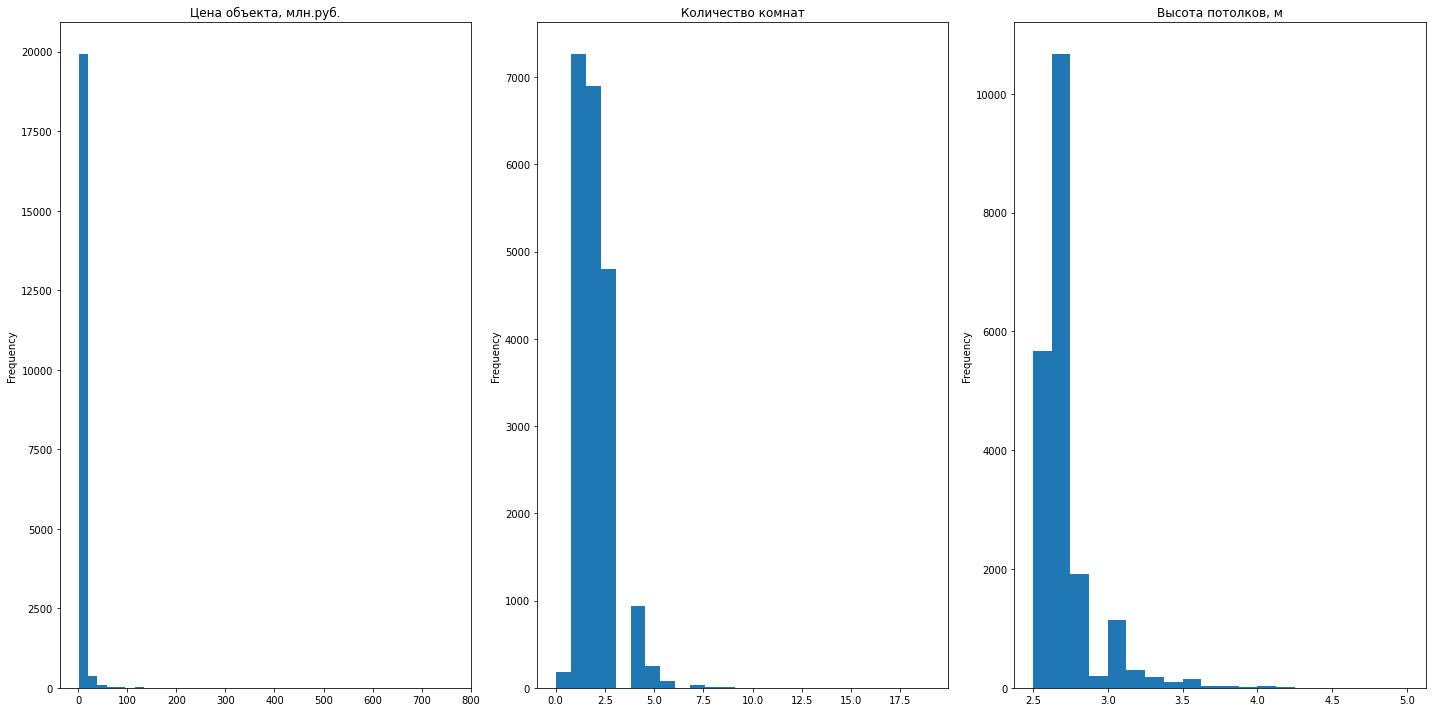

In [82]:
fig, axs = plt.subplots(1, 3)

(data['last_price'] / 1000000).plot(ax=axs[0], kind='hist', title='Цена объекта, млн.руб.', figsize=(20, 10), bins=40)
data['rooms'].plot(ax=axs[1], kind='hist', title='Количество комнат', bins=25)
data['ceiling_height'].plot(ax=axs[2], kind='hist', title='Высота потолков, м', bins=20)

plt.tight_layout()

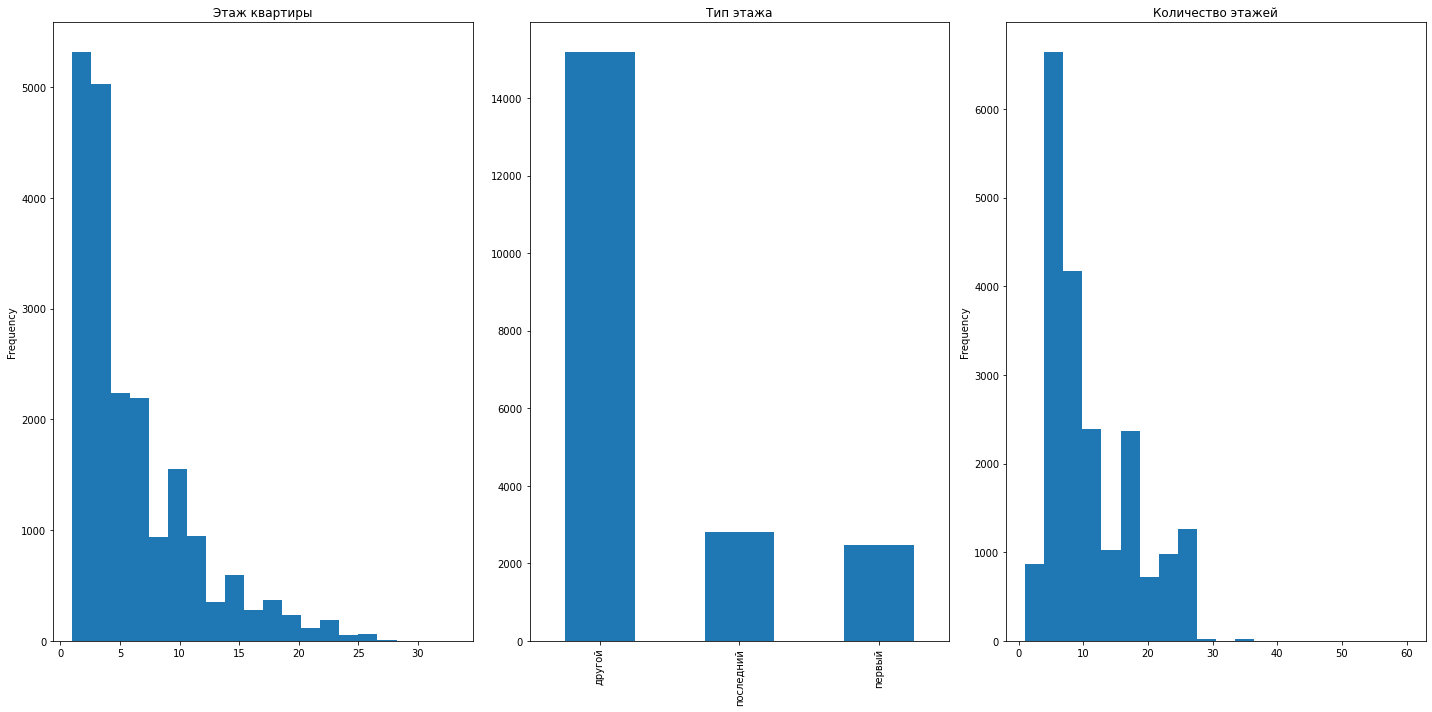

In [83]:
fig, axs = plt.subplots(1, 3)

data['floor'].plot(ax=axs[0], kind='hist', title='Этаж квартиры', figsize=(20, 10), bins=20)
data['floor_type'].value_counts().plot(ax=axs[1], kind='bar', title='Тип этажа')
data['floors_total'].plot(ax=axs[2], kind='hist', title='Количество этажей', bins=20)

plt.tight_layout()

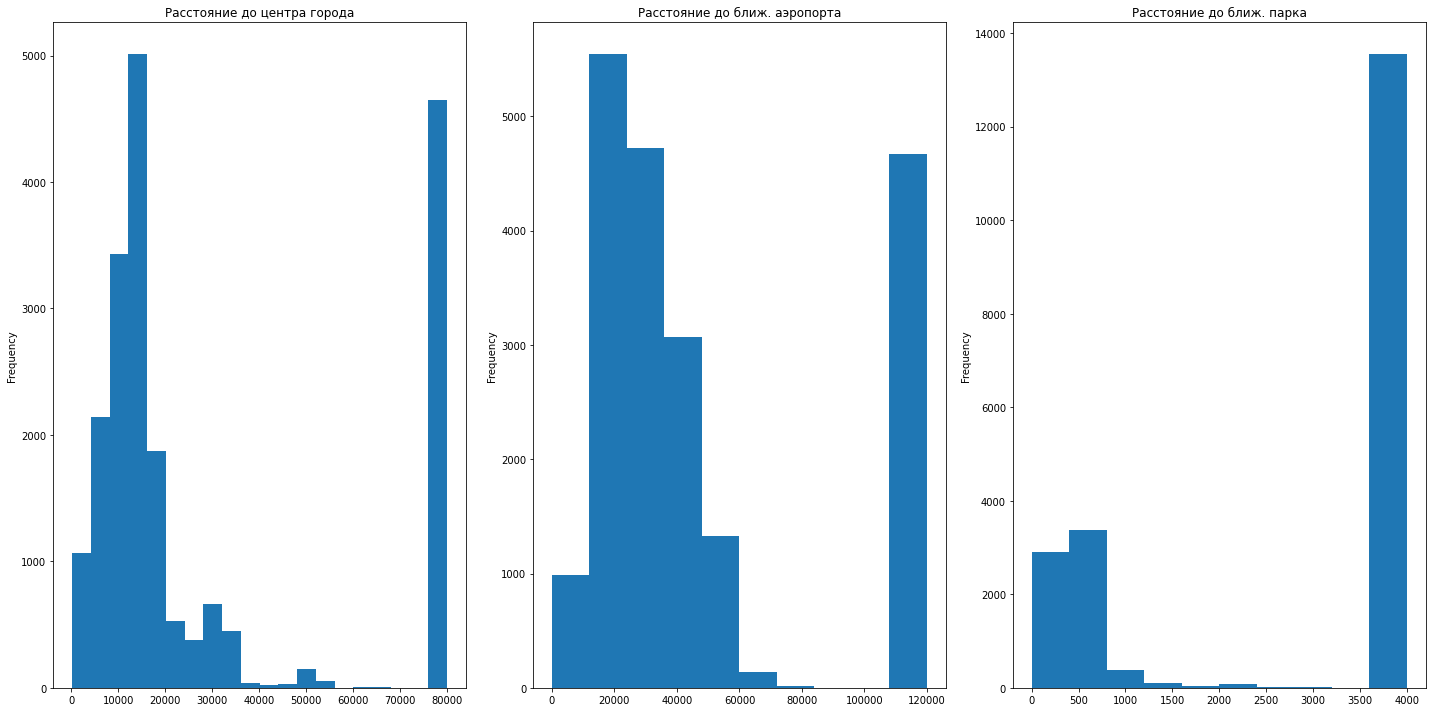

In [84]:
fig, axs = plt.subplots(1, 3)

data['cityCenters_nearest'].plot(ax=axs[0], kind='hist', title='Расстояние до центра города', figsize=(20, 10), bins=20)
data['airports_nearest'].plot(ax=axs[1], kind='hist', title='Расстояние до ближ. аэропорта')
data['parks_nearest'].plot(ax=axs[2], kind='hist', title='Расстояние до ближ. парка')

plt.tight_layout()

При рассмотрении параметров объектов, мы видим следующее:
- Наибольшее количество квартир (> 12 тыс.) имеет общую площадь до 50 кв.м, почти в два раза меньше (около 7 тыс.) объектов с площадью от 50 до 100 кв.м. и совсем небольшое количество объектов с общей площадью более 100 кв.м. Чем больше общая площадь, тем меньше предложений. 
- Интересен график с площадями кухни. На нем видно, что есть небольшое количество объектов, у которых площадь кухни равна 0. Но при обработке данных мы уже сделали вывод, что вероятно эти объекты являются студиями. Наибольшее количество объектов имеют кухню, площадь которой от 8 до 10 кв.м.
- Подавляющее большинство квартир имеет стоимость до 15 млн.руб.
- Более 7 тыс. объектов имеют одну комнату, чуть менее 7 тыс. - 2 комнаты, менее 5 тыс. - 3 комнаты, далее при увиличении количества комнат, количество объектов резко снижается. Вывод - самое востребованное жилье 1-3-комнатные квартиры. Видны на графике также и студии с нулевым количеством комнат, но их немного.
- На первом и втором этажам продается наибольшее количество квартир. Вероятно это связано с тем, что объекты недвижимости из поселков и деревень имеют малую этажность. Также возможно, что эти этажи наименее популярны и поэтому их чаще продают.
- В зданиях от 2 до 5 этажей продается почти 7000 объектов, что говорит нам о том, что люди из зданий с низкой этажностью, видимо, не очень довольны своим жильем и пытаются изменить свои условия. Низкую этажность имеют в основном старые застройки.
- По расстоянию от центра больше всего квартир находится от 10 до 15 км. Также более 4 тыс. объектов находится на расстоянии превышающем 60 км. от центра. Видимо, владельцы таких квартир не указали точный адрес в объявлении, а написали только город, поэтому система не смогла определить расстояние. По этой же причине, возможно, не определяются расстояния и до других мест (парков, водоемов, аэропортов).

**2. Как быстро продавались квартиры** 

<AxesSubplot:title={'center':'Количество дней размещения объявления'}, ylabel='Frequency'>

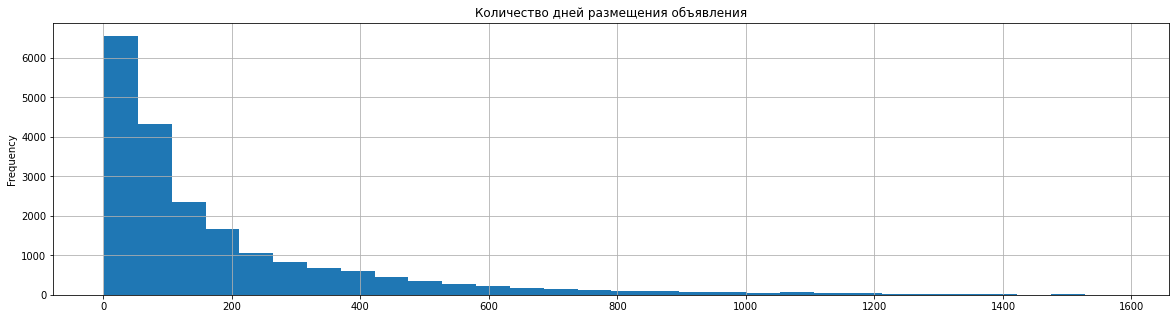

In [85]:
data['days_exposition'].plot(kind='hist', title='Количество дней размещения объявления', figsize=(20, 5), bins=30, grid=True)

In [86]:
print(data['days_exposition'].mean())

180.7531998045921


In [87]:
print(data['days_exposition'].median())

95.0


Исследовав данные по столбцу days_exposition, мы можем увидеть, что самое большое количество квартир продавалось примерно до 50 дней, чуть меньше от 50 до 100 и так далее. Встречаются объекты, которые продавались более 1000 дней, именно они повлияли на средний показатель. Возможно такой длительный период объявления были выставлены потому, что продавцы забывали их снимать. Но точная причина неизвестна. Зато медианное значение составляет 95 дней. Следовательно, можно сделать вывод, что большинство квартир продается за три месяца. 

**3. Исследование факторов, влияющих на полную стоимость квартиры**

Зависимость стоимости объекта от общей площади

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

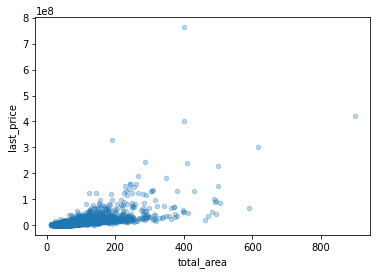

In [88]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

In [89]:
print(data['total_area'].corr(data['last_price']))

0.6432857709408003


Зависимость стоимости объекта от жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

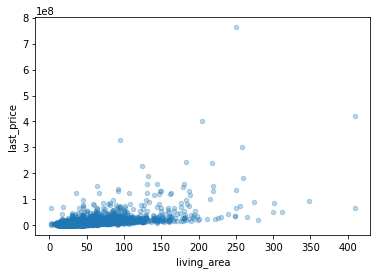

In [90]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

In [91]:
print(data['living_area'].corr(data['last_price']))

0.5458217506643347


Зависимость стоимости объекта от площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

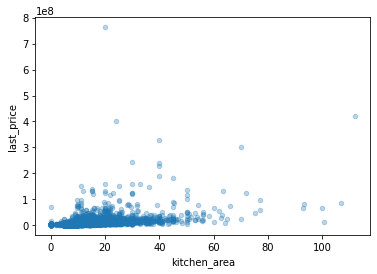

In [92]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

In [93]:
print(data['kitchen_area'].corr(data['last_price']))

0.43489399720084165


Зависимость стоимости объекта от количества комнат

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

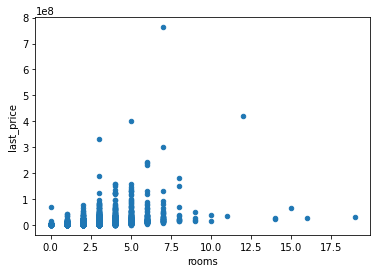

In [94]:
data.plot(x='rooms', y='last_price', kind='scatter')

In [95]:
print(data['rooms'].corr(data['last_price']))

0.3540388640765198


Зависимость стоимости объекта от этажа, на котором расположена квартира (первый, последний, другой)

In [96]:
for t in data['floor_type'].unique():
    print('Тип этажа:', t, '| Медианное значение полной стоимости:', data.loc[data['floor_type'] == t]['last_price'].median())

Тип этажа: первый | Медианное значение полной стоимости: 3800000.0
Тип этажа: другой | Медианное значение полной стоимости: 4700000.0
Тип этажа: последний | Медианное значение полной стоимости: 4250000.0


Зависимость стоимости объекта от даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='day_of_week', ylabel='last_price'>

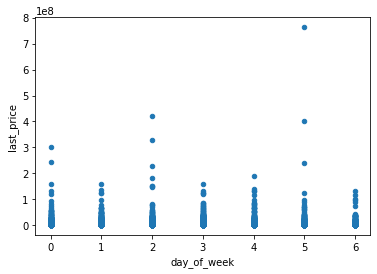

In [97]:
data.plot(x='day_of_week', y='last_price', kind='scatter') #График зависимости стоимости от дня недели

In [98]:
print(data['day_of_week'].corr(data['last_price']))

0.0046531734607464185


In [99]:
for t in data['day_of_week'].sort_values().unique():
    print('День недели:', t, '| Медианное значение полной стоимости:', data.loc[data['day_of_week'] == t]['last_price'].median())

День недели: 0 | Медианное значение полной стоимости: 4500000.0
День недели: 1 | Медианное значение полной стоимости: 4600000.0
День недели: 2 | Медианное значение полной стоимости: 4550000.0
День недели: 3 | Медианное значение полной стоимости: 4575000.0
День недели: 4 | Медианное значение полной стоимости: 4490000.0
День недели: 5 | Медианное значение полной стоимости: 4500000.0
День недели: 6 | Медианное значение полной стоимости: 4450000.0


<AxesSubplot:xlabel='publication_month', ylabel='last_price'>

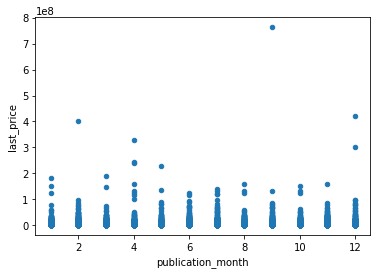

In [100]:
data.plot(x='publication_month', y='last_price', kind='scatter') #График зависимости стоимости от месяца размещения объявления

In [101]:
print(data['publication_month'].corr(data['last_price']))

0.00553318573448676


In [102]:
for t in data['publication_month'].sort_values().unique():
    print('Месяц:', t, '| Медианное значение полной стоимости:', data.loc[data['publication_month'] == t]['last_price'].median())

Месяц: 1 | Медианное значение полной стоимости: 4500000.0
Месяц: 2 | Медианное значение полной стоимости: 4500000.0
Месяц: 3 | Медианное значение полной стоимости: 4500000.0
Месяц: 4 | Медианное значение полной стоимости: 4590000.0
Месяц: 5 | Медианное значение полной стоимости: 4500000.0
Месяц: 6 | Медианное значение полной стоимости: 4370000.0
Месяц: 7 | Медианное значение полной стоимости: 4500000.0
Месяц: 8 | Медианное значение полной стоимости: 4500000.0
Месяц: 9 | Медианное значение полной стоимости: 4650000.0
Месяц: 10 | Медианное значение полной стоимости: 4500000.0
Месяц: 11 | Медианное значение полной стоимости: 4600000.0
Месяц: 12 | Медианное значение полной стоимости: 4550000.0


<AxesSubplot:xlabel='publication_year', ylabel='last_price'>

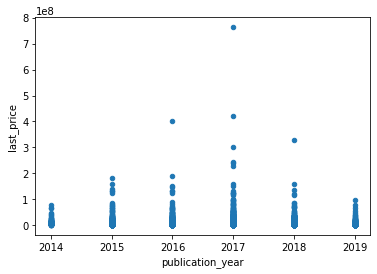

In [103]:
data.plot(x='publication_year', y='last_price', kind='scatter') # График зависимости стоимости недвижимости от года

In [104]:
print(data['last_price'].corr(data['publication_year']))

-0.06081725777681305


Исследовав факторы влияющие на общую стоимость квартиры, можно сделать вывод, что самое большое влияние оказывают общая и жилая площади. Чем больше площадь, тем выще стоимость недвижимости. Количество комнат меньше коррелирует со стоимостью. Прослеживается явная зависимость цены от типа этажа: первый этаж - самый дешевый, последний имеет более высокую стоимость, но значительно уступает в цене другим этажам. По графикам и коэффициенту корреляции видно, что день недели и месяц размещения объявления на стоимость объекта практически не влияют, коэффициент корреляции близок к нулю. Хотя, среди месяцев, выделяется июнь, в этом месяце стоимость чуть ниже. Скорее всего те, кто разместил объявление в начале лета, долго не могли дождаться покупателя в сезон отпусков, и поэтому снизили цены на свои объекты. 

На графике зависимости стоимости от года размещения корреляция также практически нулевая, хотя, обычно стоимость с течением времени повышается, но, возможно, именно в этот интервал времени цены в рассматриваемом регионе держались в среднем на одном уровне. Возможно также на такую картину оказали влияние и другие факторы. Например, повысились ипотечные ставки, из-за этого спрос упал, а при падении спроса цена повышаться не может.

**4. Расчет средней цены квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений. Выделение пунктов с наибольшей и с наименьшей ценой за квадратный метр.** 

In [105]:
print(data['locality_name'].value_counts()[0:10])

Санкт-Петербург      13638
поселок Мурино         551
поселок Шушары         408
Всеволожск             339
Колпино                308
Пушкин                 307
поселок Парголово      302
деревня Кудрово        299
Гатчина                268
Выборг                 208
Name: locality_name, dtype: int64


In [106]:
list_locality_name = ['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Колпино', 'Пушкин', 
                      'поселок Парголово', 'деревня Кудрово', 'Гатчина', 'Выборг']

In [107]:
print(data.query('locality_name in @list_locality_name')['square_meter_price'].mean().round())

106727.0


In [108]:
data.groupby('locality_name')['square_meter_price'].median().round().sort_values()

locality_name
деревня Старополье                            11000.0
поселок при железнодорожной станции Свирь     11481.0
деревня Вахнова Кара                          11688.0
деревня Выскатка                              12335.0
поселок Совхозный                             12629.0
                                               ...   
Пушкин                                        97938.0
Сестрорецк                                    98341.0
Кудрово                                       98604.0
Зеленогорск                                  100000.0
Санкт-Петербург                              103063.0
Name: square_meter_price, Length: 293, dtype: float64

In [109]:
print(data['square_meter_price'].max())

1907500.0


In [110]:
data.query('square_meter_price == square_meter_price.max()')['locality_name']

12971    Санкт-Петербург
Name: locality_name, dtype: object

In [111]:
print(data['square_meter_price'].min().round())

7963.0


In [112]:
data.query('square_meter_price == square_meter_price.min()')['locality_name']

14911    поселок при железнодорожной станции Свирь
Name: locality_name, dtype: object

Мы провели исследование, в результате которого выделили десять пунктов с самым большим количеством объявлений. Возглавляет этот список город Санкт-Петербург. Средняя цена одного квадратного метра по этим населенным пуктам составляет 106721. 
Самое высокое медианное значение стоимости квадратного метра в Санкт-Петербурге: 103057 руб., самое низкое в деревне Старополье - 11000 руб. 
Объект с максимальной ценой за квадратный метр выделен в городе Санкт-Петербург, с минимальной ценой - в поселке станции Свирь.

**5. Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра**

<AxesSubplot:xlabel='cityCenters_nearest_km'>

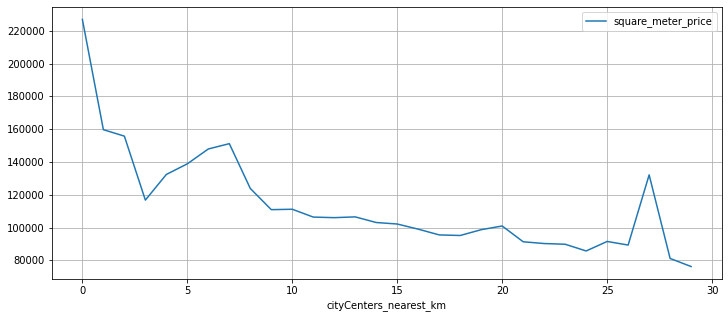

In [113]:
(data
 .query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km < 80')
 .pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
)

На графике мы видим, что, чем дальше объект находится от центра, тем ниже средняя цена за квадратный метр. Есть в некоторых местах выбросы, но они в целом тенденцию зависимости цены от удаленности не нарушают.

### Общий вывод

В данном проекте был проведен исследовательский анализ данных с целью определения особенностей и зависимостей, которые существуют на рынке недвижимости. Входные данные от сервиса Яндекс Недвижимость - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

Целью исследования является проверка нескольких гипотез:

Гипотеза 1: общая стоимость объекта недвижимости зависит от общей, жилой площадей и от площади кухни;

Гипотеза 2: общая стоимость объекта недвижимости зависит от количества комнат;

Гипотеза 3: общая стоимость объекта недвижимости зависит от этажа, на котором он расположен;

Гипотеза 4: общая стоимость объекта недвижимости зависит от даты размещения объявления;

Гипотеза 5: общая стоимость объекта недвижимости зависит от расстояния до центра города.

В результате проверки гипотез мы установили:

**Гипотеза 1 подтвердилась:**

Зависимость стоимости объекта от общей и жилой площадей, а также от площади кухни существует. Чем больше площади, тем выше стоимость недвижимости.


**Гипотеза 2 подтверждена:**

Зависимость стоимости объекта от количества комнат также есть, но коэффициент корреляции ниже, чем у параметров, связанных с площадями.


**Гипотеза 3 подтверждена:**

Зависимость стоимости объекта от этажа также есть. Выделяются первый и последний этажи, на них цены ниже, чем на остальные. Если сравнивать первый и последний этаж, то объекты на первом этаже стоят дешевле. Медианные значения цен по региону в рассматриваемом временном периоде составили: 3 800 000 - первые этажи, 4 250 000 - последние этажи, 4 700 000 - другие этажи.

**Гипотеза 4 не подтверждена:**

Зависимость между датой публикации объявлений и стоимостью недвижимости не была выявлена. Есть месяц, который выделяется - это июнь. Квартиры, который начали продаваться с начала лета были проданы по более низкой цене, чем остальные.

**Гипотеза 5 подтверждена:**

Есть прямая зависимость стоимости недвижимости от расстояния от центра города.


Общие рекомендации:

При исследовании данных были выявлены многочисленные пропуски в полях с расстояниями до различных объектов, таких, как аэропорт, парки, водоемы, центр города. Данные поля заполняются автоматически, но зависят от адреса, который ввел пользователь. 

20924 пропусков выявлено в столбце с информацией о том, является объект апартаментами или квартирой. 

Решением проблемы многочисленных пропусков могло бы стать введение обязательного заполнения соответсвующих полей в системе с выбором значений из списка.
